In [111]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Загрузка базы данных в DataFrame
### Перед работой с базой данных в Jupyter notebook следует экспортировать ее из MS SQL. Сделаем это с помощью подключения базы данных в Python (библиотека pyodbc).


In [112]:
# Параметры подключения
server = 'DESKTOP-6DUSSHV\SQLEXPRESS'
database = 'final'

# Подключение к базе данных
connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;TrustServerCertificate=yes;'
conn = pyodbc.connect(connection_string)

# Загрузка данных в DataFrame
query = 'SELECT * FROM exams'
df = pd.read_sql(query, conn)
print(df.head())
conn.close()

   student_id gender  age  study_hours_per_week race_ethnicity  \
0           1   male   16                    20        group B   
1           2   male   20                    32        group B   
2           3   male   19                    17        group B   
3           4   male   22                    14        group B   
4           5   male   17                    20        group B   

  parental_level_of_education     lunch test_preparation_course  math_level  \
0            some high school  standard                    none    beginner   
1                some college  standard                    none    beginner   
2                some college  standard                    none    beginner   
3                some college  standard                    none  intermedia   
4                some college  standard                    none    advanced   

   math_score reading_level  reading_score writing_level  writing_score  \
0          52      advanced             48    interme

C:\Users\rodik\AppData\Local\Temp\ipykernel_20344\2374190639.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


## Выборка 1: Гистограммы распределения баллов по каждому предмету

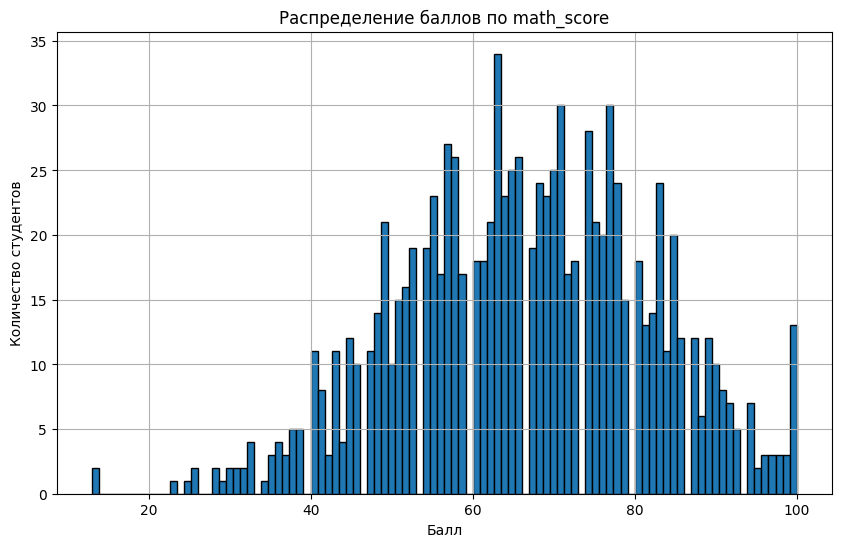

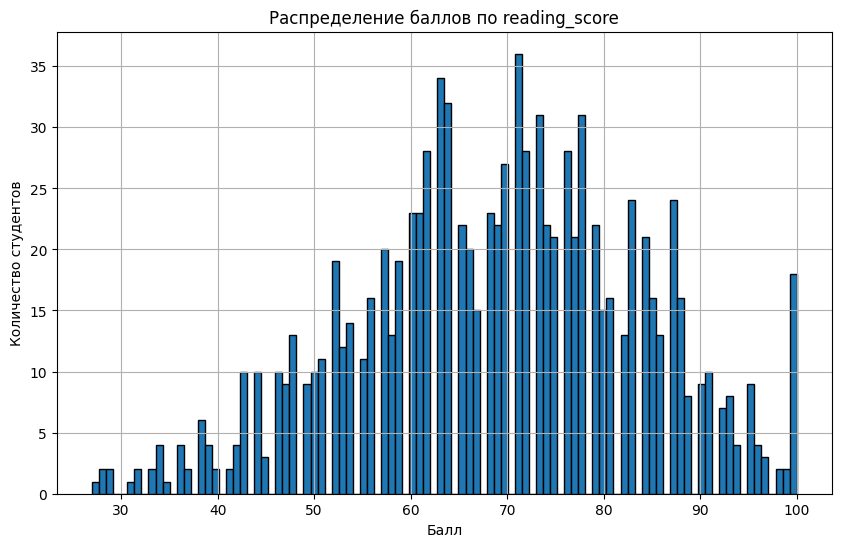

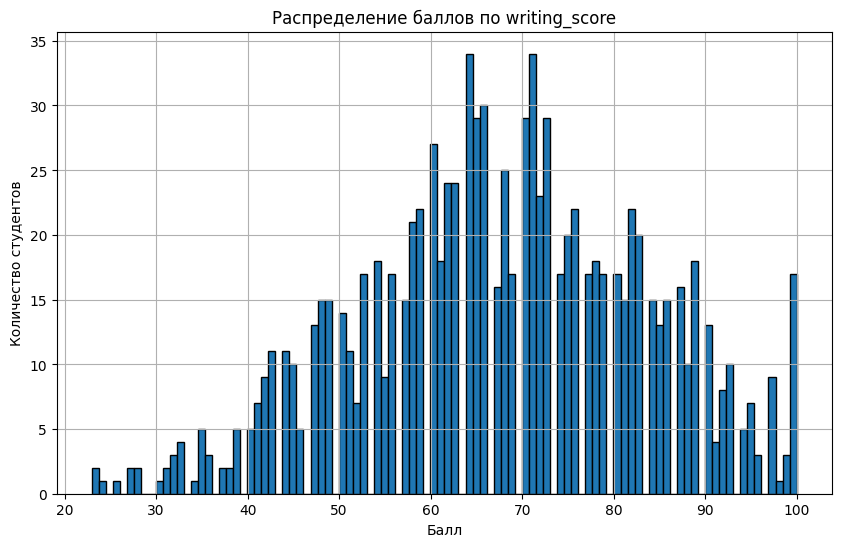

In [113]:
# Определение списка предметов
subjects = ['math_score', 'reading_score', 'writing_score']

# Построение гистограмм (hist)
for subject in subjects:
    plt.figure(figsize=(10, 6))
    plt.hist(df[subject], bins=100, edgecolor='k')
    plt.title(f'Распределение баллов по {subject}')
    plt.xlabel('Балл')
    plt.ylabel('Количество студентов')
    plt.grid(True)
    plt.show()


## Выборка 2: Средние баллы по предметам для каждого уровня образования родителей

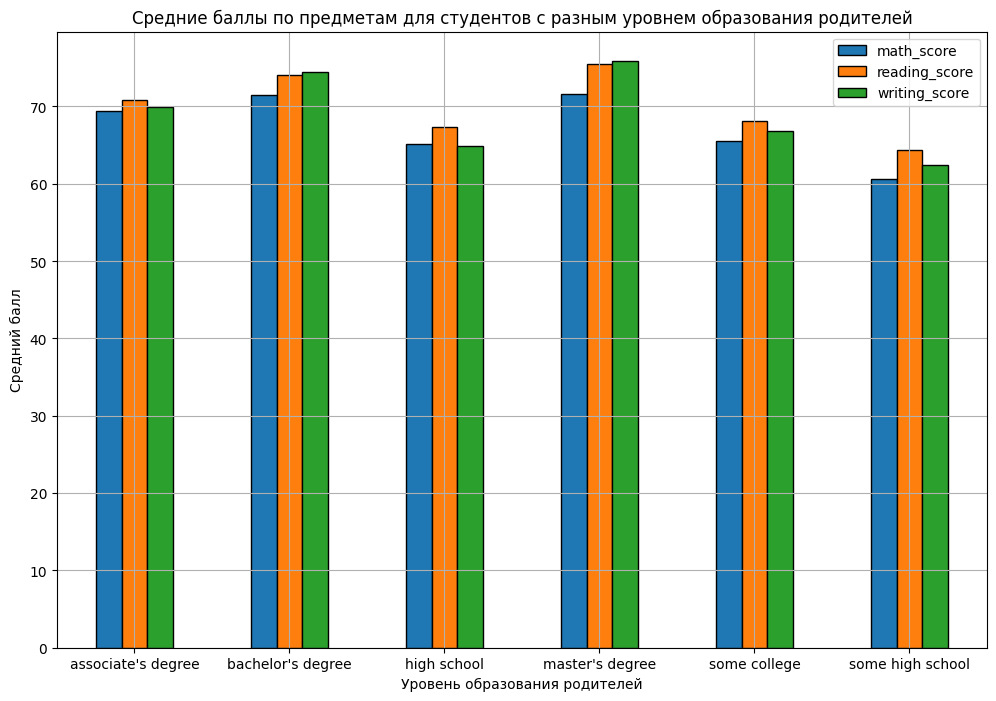

In [114]:
# Группировка данных
mean_scores = df.groupby('parental_level_of_education')[subjects].mean().reset_index()

# Построение столбчатой диаграммы (bar graph)
mean_scores.plot(kind='bar', x='parental_level_of_education', figsize=(12, 8), edgecolor='k')
plt.title('Средние баллы по предметам для студентов с разным уровнем образования родителей')
plt.xlabel('Уровень образования родителей')
plt.xticks(rotation=0)
plt.ylabel('Средний балл')
plt.grid(True)
plt.show()

## Выборка 3: Зависимость баллов по математике от времени, проведенного на учебу

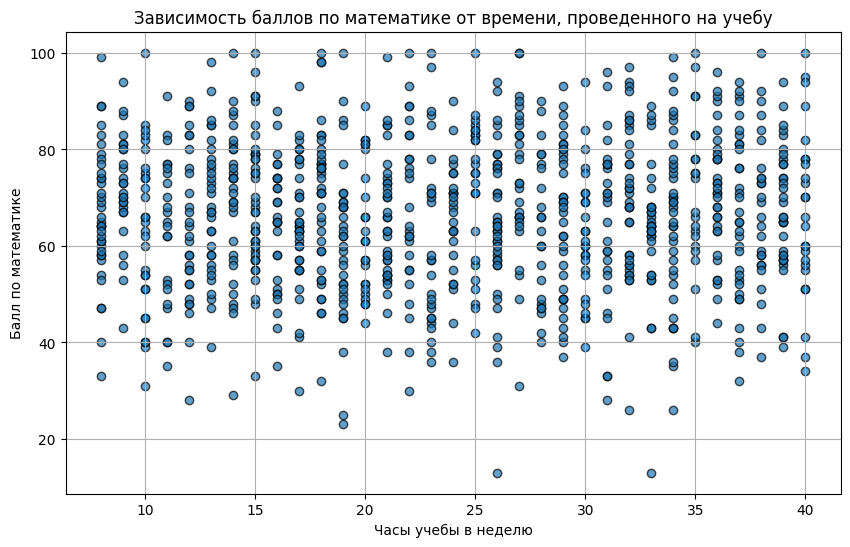

In [115]:
# Построение диаграммы рассеяния (scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(df['study_hours_per_week'], df['math_score'], alpha=0.7, edgecolors='k')
plt.title('Зависимость баллов по математике от времени, проведенного на учебу')
plt.xlabel('Часы учебы в неделю')
plt.ylabel('Балл по математике')
plt.grid(True)
plt.show()

## Выборка 4: Зависимость среднего балла по английскому языку от возраста студентов

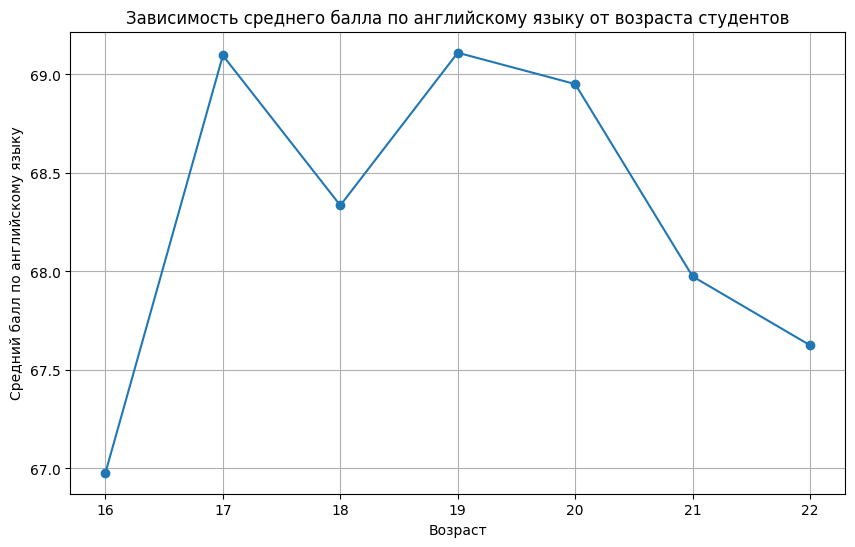

In [116]:
# Создание нового столбца как среднего значения между 'reading_score' и 'writing_score'
df['english_score'] = df[['reading_score', 'writing_score']].mean(axis=1)
age_mean_scores = df.groupby('age')['english_score'].mean().reset_index()

# Построение графика (line chart)
plt.figure(figsize=(10, 6))
plt.plot(age_mean_scores['age'], age_mean_scores['english_score'], marker='o')
plt.title('Зависимость среднего балла по английскому языку от возраста студентов')
plt.xlabel('Возраст')
plt.ylabel('Средний балл по английскому языку')
plt.grid(True)
plt.show()

## Выборка 5: Распределение баллов по предметам для студентов разного пола

<Figure size 1000x600 with 0 Axes>

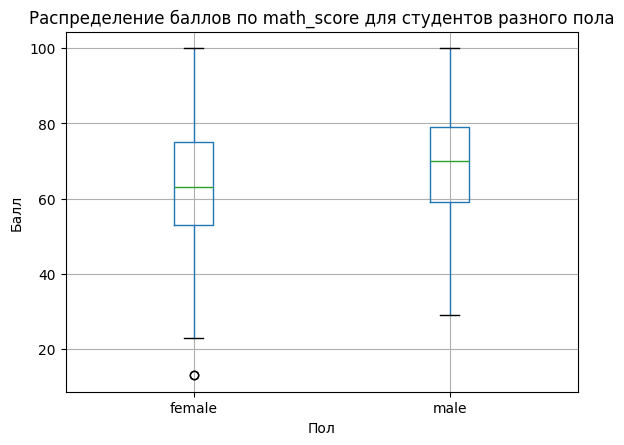

<Figure size 1000x600 with 0 Axes>

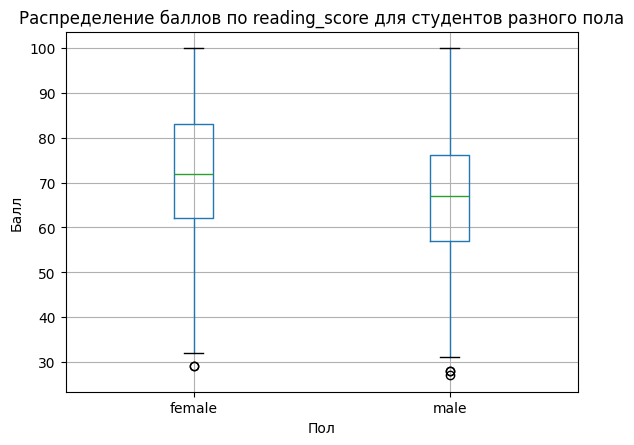

<Figure size 1000x600 with 0 Axes>

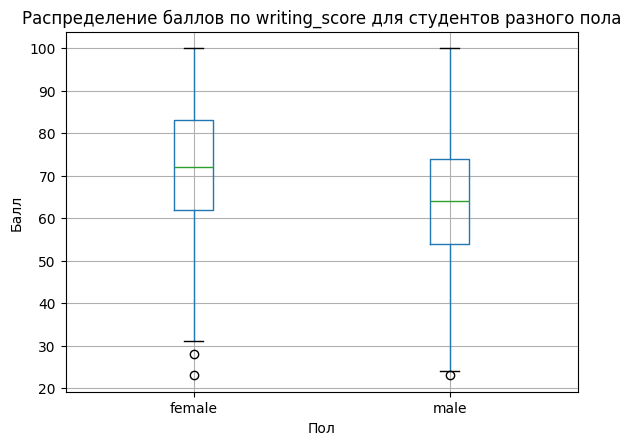

In [117]:
# Построение коробчатых диаграмм (box plots)
for subject in subjects:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=subject, by='gender', grid=True)
    plt.title(f'Распределение баллов по {subject} для студентов разного пола')
    plt.suptitle('')
    plt.xlabel('Пол')
    plt.ylabel('Балл')
    plt.show()

## Выборка 6: Тепловая карта зависимости баллов по предметам от уровня подготовки по математике и времени, проведенного на учебу

C:\Users\rodik\AppData\Local\Temp\ipykernel_20344\3184587806.py:2: FutureWarning: The provided callable <function mean at 0x000001F335119260> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_tables = {subject: pd.pivot_table(df, values=subject, index='math_level', columns='study_hours_per_week', aggfunc=np.mean) for subject in subjects}
C:\Users\rodik\AppData\Local\Temp\ipykernel_20344\3184587806.py:2: FutureWarning: The provided callable <function mean at 0x000001F335119260> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_tables = {subject: pd.pivot_table(df, values=subject, index='math_level', columns='study_hours_per_week', aggfunc=np.mean) for subject in subjects}
C:\Users\rodik\AppData\Local\Temp\ipykernel_20344\3184

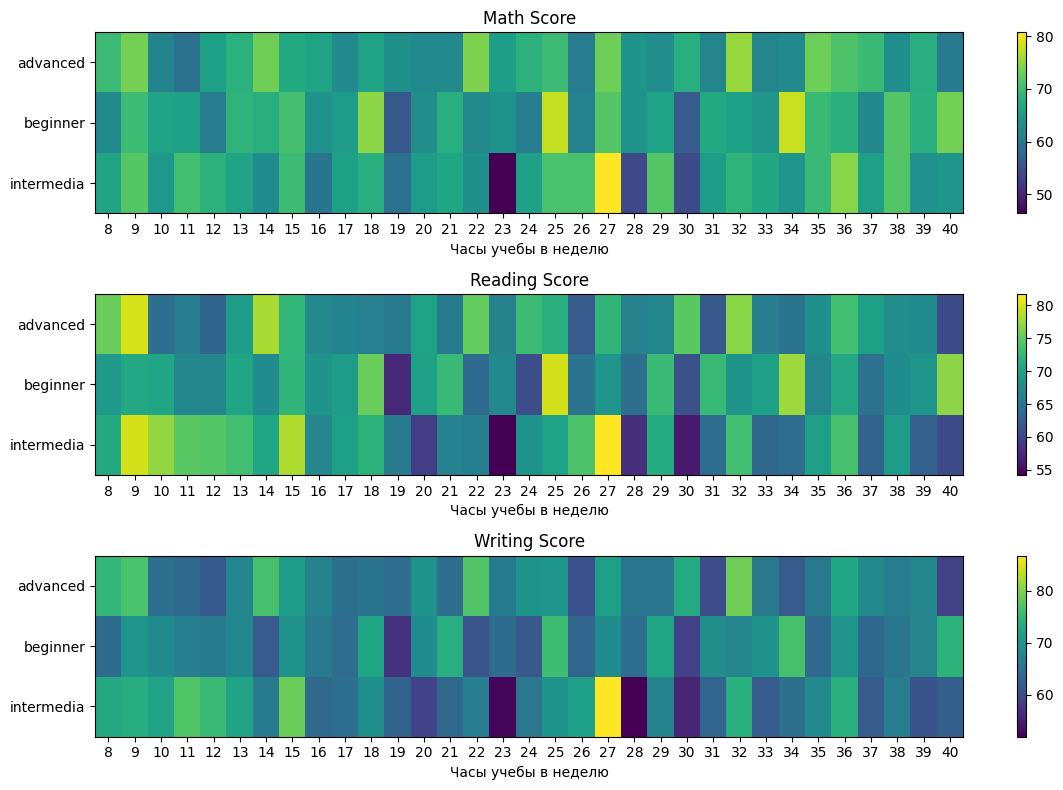

In [118]:
# Создание сводных таблиц для каждого предмета
pivot_tables = {subject: pd.pivot_table(df, values=subject, index='math_level', columns='study_hours_per_week', aggfunc=np.mean) for subject in subjects}

# Построение тепловых карт
fig, axes = plt.subplots(3, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 1, 1]})

for ax, subject in zip(axes, subjects):
    pivot_table = pivot_tables[subject]
    cax = ax.matshow(pivot_table, cmap='viridis', aspect='auto')

    # Настройка осей
    xticks = np.arange(0, len(pivot_table.columns))
    yticks = np.arange(0, len(pivot_table.index))

    ax.set_xticks(xticks)
    ax.set_xticklabels(pivot_table.columns)
    ax.set_yticks(yticks)
    ax.set_yticklabels(pivot_table.index)

    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_position('bottom')
    ax.set_xlabel('Часы учебы в неделю')

    # Заголовок
    ax.set_title(f'{subject.replace("_", " ").title()}')

    # Добавление цветовой шкалы для каждой тепловой карты
    fig.colorbar(cax, ax=ax, orientation='vertical')

# Отображение графиков
plt.tight_layout()
plt.show()

## Выборка 7: Средние баллы по предметам для студентов с разным уровнем подготовки по чтению

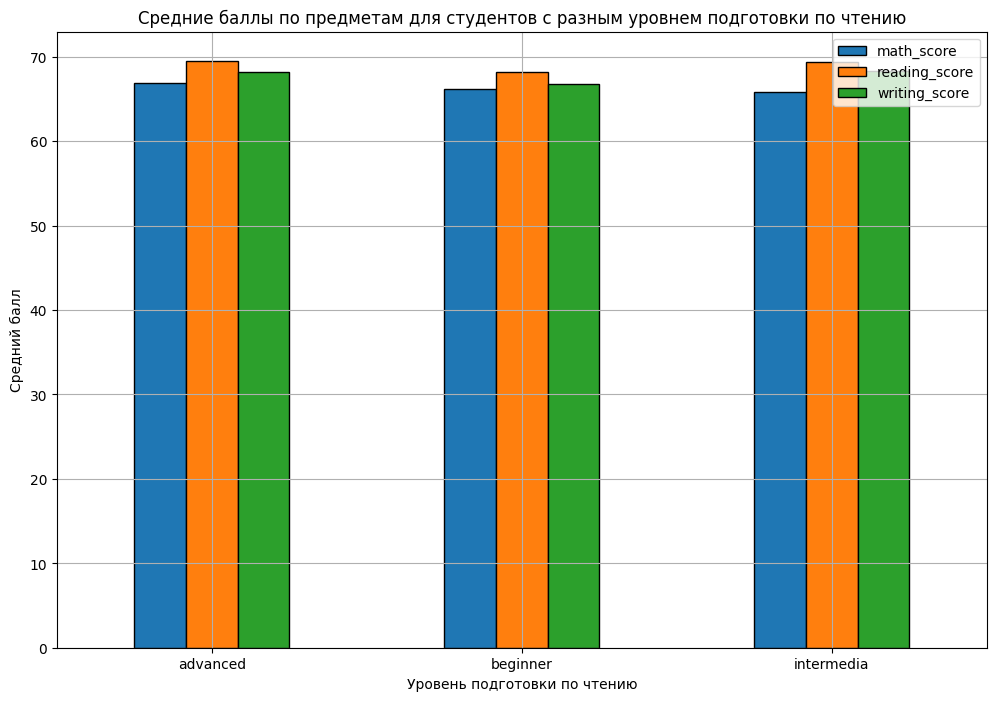

In [119]:
# Группировка данных
mean_reading_scores = df.groupby('reading_level')[subjects].mean().reset_index()

# Построение столбчатой диаграммы (bar graph)
mean_reading_scores.plot(kind='bar', x='reading_level', figsize=(12, 8), edgecolor='k')
plt.title('Средние баллы по предметам для студентов с разным уровнем подготовки по чтению')
plt.xlabel('Уровень подготовки по чтению')
plt.ylabel('Средний балл')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

## Выборка 8: Зависимость баллов по письменному английскому от уровня подготовки по письменному английскому

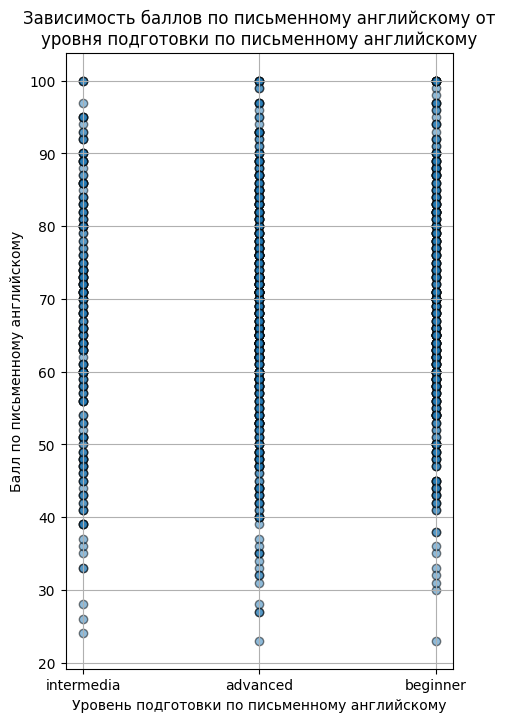

In [120]:
# Построение диаграммы рассеяния (scatter plot)
plt.figure(figsize=(5, 8))
plt.scatter(df['writing_level'], df['writing_score'], alpha=0.5, edgecolors='k')
plt.title('Зависимость баллов по письменному английскому от\nуровня подготовки по письменному английскому')
plt.xlabel('Уровень подготовки по письменному английскому')
plt.ylabel('Балл по письменному английскому')
plt.grid(True)
plt.show()

## *Выборка 8: Зависимость баллов по письменному английскому от уровня подготовки по письменному английскому

<Figure size 1000x1000 with 0 Axes>

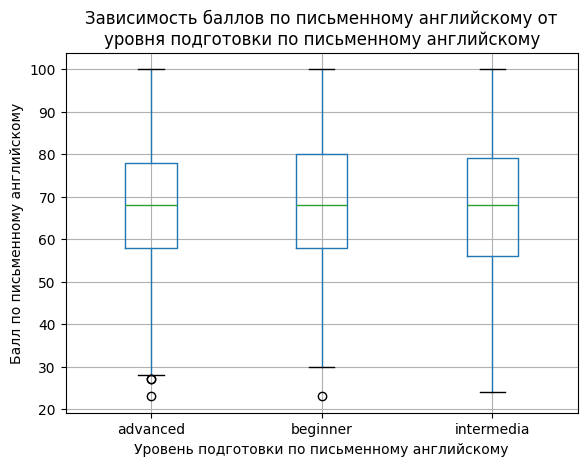

In [121]:
# Построение коробчатых диаграмм (box plot)
plt.figure(figsize=(10, 10))
df.boxplot(column='writing_score', by='writing_level')
plt.title('Зависимость баллов по письменному английскому от\nуровня подготовки по письменному английскому')
plt.suptitle('')
plt.xlabel('Уровень подготовки по письменному английскому')
plt.ylabel('Балл по письменному английскому')
plt.grid(True)
plt.show()

## Выборка 9: Временная шкала (timeline), отображающая средние баллы по каждому предмету за разные годы

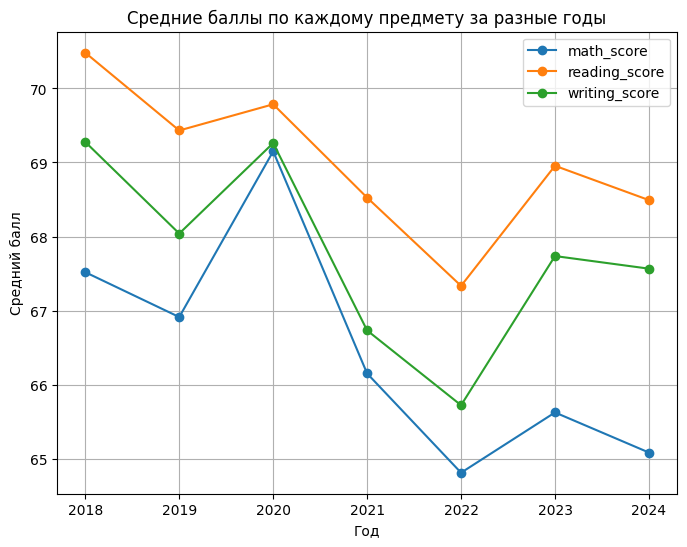

In [122]:
# Группировка данных
mean_scores_by_year = df.groupby('year_of_exam')[subjects].mean().reset_index()

plt.figure(figsize=(8, 6))
for subject in subjects:
    plt.plot(mean_scores_by_year['year_of_exam'], mean_scores_by_year[subject], marker='o', label=subject)

# Настройка графика
plt.title('Средние баллы по каждому предмету за разные годы')
plt.xlabel('Год')
plt.ylabel('Средний балл')
plt.legend()
plt.grid(True)
plt.show()

## Выборка 10: Гистограммы распределения баллов по математике для студентов с разным уровнем образования родителей

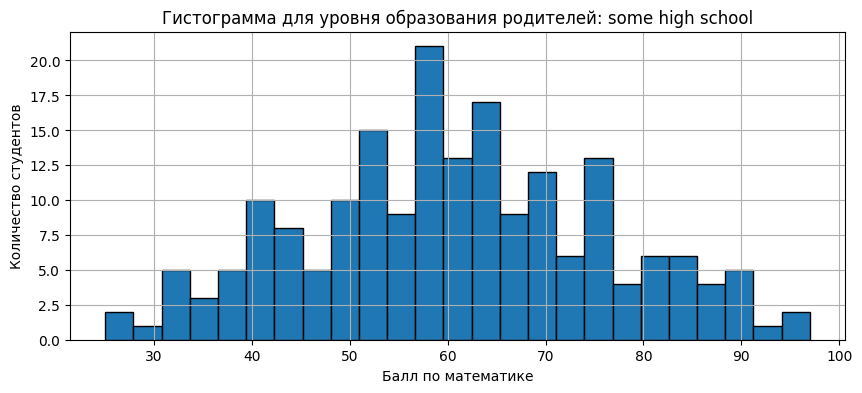

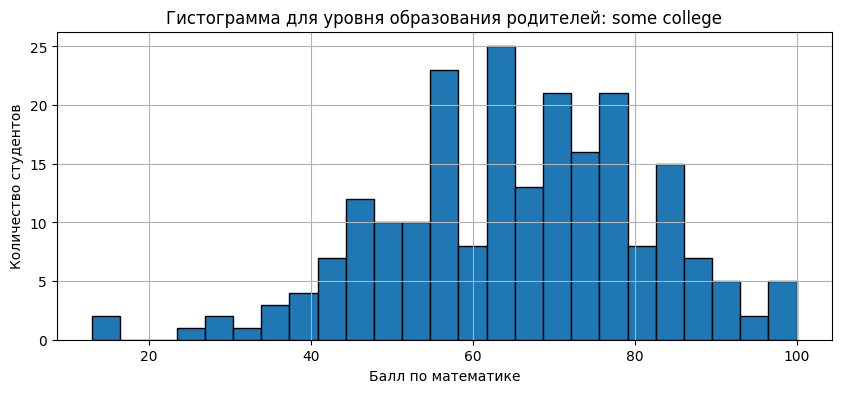

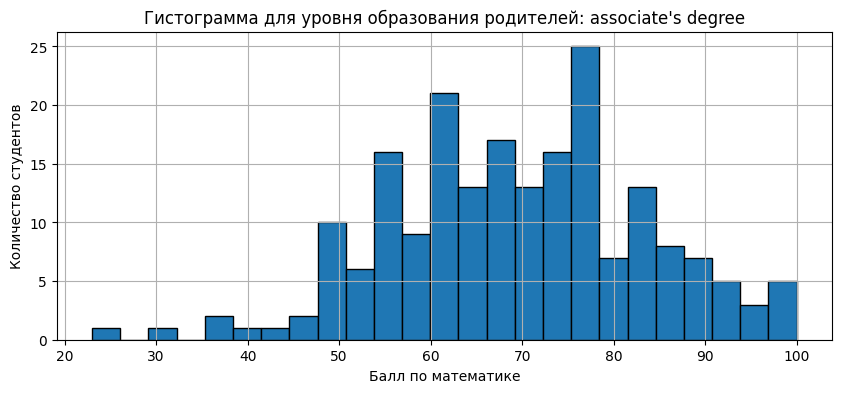

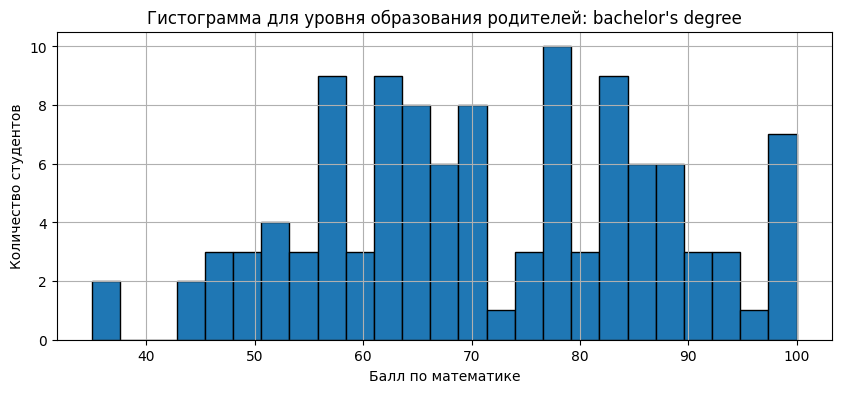

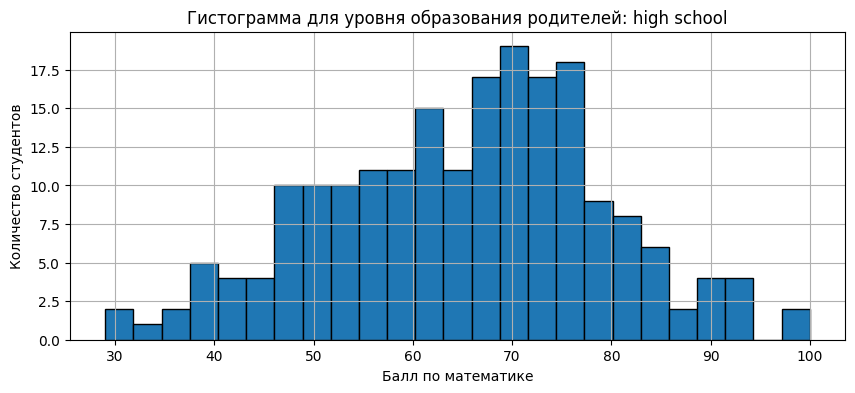

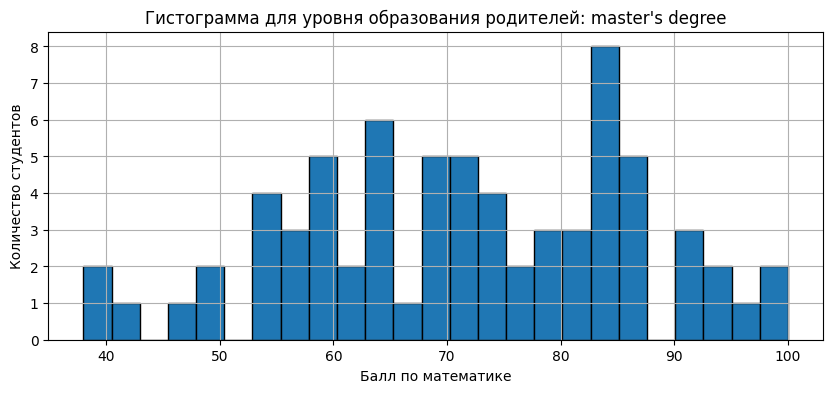

In [123]:
education_levels = df['parental_level_of_education'].unique()

for level in education_levels:
    # Фильтруем данные
    subset = df[df['parental_level_of_education'] == level]
    plt.figure(figsize=(10, 4))
    plt.hist(subset['math_score'], bins=25, edgecolor='black')
    # Настройка графиков
    plt.title(f'Гистограмма для уровня образования родителей: {level}')
    plt.xlabel('Балл по математике')
    plt.ylabel('Количество студентов')
    plt.grid(True)
    plt.show()